In [1]:
import io
from google.cloud import speech
from google.cloud.speech import enums
from google.cloud.speech import types

import wave

import numpy as np

from PIL import Image
import cv2

In [2]:
from bs4 import BeautifulSoup as Soup
import urllib2
import json
import urllib

In [3]:
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/mthielk/Transcription/Transcription-d0b09ac1dc82.json'

In [4]:
client = speech.SpeechClient()

In [5]:
speech_file = '/home/mthielk/Transcription/RobertQuimby_mixdown171210MONO.wav'
# with io.open(speech_file, 'rb') as audio_file:
#     content = audio_file.read(1048500)

In [8]:
# content_list = []
# counter = 0
# with io.open(speech_file, 'rb') as audio_file:
#     while True:
#         temp_content = audio_file.read(10485000)
#         print counter
#         if temp_content:
#             content_list.append(temp_content)
#             counter += 1
#         elif counter >= 1000:
#             print 'counter expired...'
#             print temp_content
#             break
#         else:
#             print 'finished at ', counter
#             break

0
1
2
3
4
5
6
7
8
finished at  8


In [ ]:
wav_file = wave.open(speech_file, 'r')

In [33]:
print wav_file.getparams()
print float(wav_file.getnframes()) / wav_file.getframerate()
wav_length = float(wav_file.getnframes()) / wav_file.getframerate()

(1, 2, 44100, 36666458, 'NONE', 'not compressed')
831.438956916


In [34]:
# audio = types.RecognitionAudio(content=content)
# config = types.RecognitionConfig(
#     encoding=enums.RecognitionConfig.AudioEncoding.LINEAR16,
#     sample_rate_hertz=44100,
#     language_code='en-US')

In [35]:
# response = client.recognize(config, audio)

In [37]:
# response

results {
  alternatives {
    transcript: "San Diego is one of the largest scientific research hubs in the country so who are the Intrepid scientist in"
    confidence: 0.948918521404
  }
}

In [9]:
# stream = content_list
# requests = (types.StreamingRecognizeRequest(audio_content=chunk)
#                 for chunk in stream)
# config = types.RecognitionConfig(
#             encoding=enums.RecognitionConfig.AudioEncoding.LINEAR16,
#             sample_rate_hertz=44100,
#             language_code='en-US')
# streaming_config = types.StreamingRecognitionConfig(config=config)

In [14]:
# responses = client.streaming_recognize(streaming_config, requests)

In [15]:
#  for response in responses:
#         # Once the transcription has settled, the first result will contain the
#         # is_final result. The other results will be for subsequent portions of
#         # the audio.
#         for result in response.results:
#             print('Finished: {}'.format(result.is_final))
#             print('Stability: {}'.format(result.stability))
#             alternatives = result.alternatives
#             # The alternatives are ordered from most likely to least.
#             for alternative in alternatives:
#                 print('Confidence: {}'.format(alternative.confidence))
#                 print('Transcript: {}'.format(alternative.transcript))

_Rendezvous: <_Rendezvous of RPC that terminated with (StatusCode.INVALID_ARGUMENT, Client GRPC deadline too short. Should be at least: 3 * audio-duration + 5 seconds. Current deadline is: 189.99899604386883 second(s). Required at least: 362 second(s).)>

In [6]:
gcs_uri = 'gs://3t3/RobertQuimby_mixdown171210MONO.wav'
audio = types.RecognitionAudio(uri=gcs_uri)
config = types.RecognitionConfig(
        encoding=enums.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=44100,
        language_code='en-US',
        enable_word_time_offsets=True)

In [7]:
operation = client.long_running_recognize(config, audio)
print('Waiting for operation to complete...')
response = operation.result(timeout=90*60)
print response

Waiting for operation to complete...
results {
  alternatives {
    transcript: "San Diego is one of the largest scientific research helps in the country so who are the Intrepid scientist in search of Discovery pushing the frontiers of human knowledge this is rad scientist"
    confidence: 0.939239680767
    words {
      start_time {
        seconds: 4
        nanos: 300000000
      }
      end_time {
        seconds: 4
        nanos: 700000000
      }
      word: "San"
    }
    words {
      start_time {
        seconds: 4
        nanos: 700000000
      }
      end_time {
        seconds: 5
        nanos: 100000000
      }
      word: "Diego"
    }
    words {
      start_time {
        seconds: 5
        nanos: 100000000
      }
      end_time {
        seconds: 5
        nanos: 300000000
      }
      word: "is"
    }
    words {
      start_time {
        seconds: 5
        nanos: 300000000
      }
      end_time {
        seconds: 5
        nanos: 500000000
      }
      word: "

In [8]:
full_transcript = ' '.join([t.alternatives[0].transcript for t in response.results])

In [169]:
full_transcript

u"San Diego is one of the largest scientific research hubs in the country so who are the Intrepid scientist in search of Discovery pushing the frontiers of human knowledge this is rad scientist  where the scientist becomes the subject I'm your house Margo wall today is Brad scientist is a Starman Observatory and a associate professor of astronomy at San Diego State University and space but his career as an astronomer almost didn't happen to understand why we have to go back to Orange County in the mid-90s when Robert was only a teen can I take him home everyday and I practice so I'm leaving one day I'm getting in my car right next to the school with my two trombones and somebody cleaned out of a window from when the school buildings and yells to me where you play Trombone I'm looking at the two trombones in my head like yeah  then he said when join my band okay you said hey we got a gig on Saturday and are trombone players grounded can you sitting for him that wasn't start  the band is

In [9]:
timings = [(word_struct.word, float(word_struct.start_time.seconds) + float(word_struct.start_time.nanos) / 1000000000, float(word_struct.end_time.seconds) + float(word_struct.end_time.nanos) / 1000000000) for t in response.results for word_struct in t.alternatives[0].words]

In [234]:
timings

[(u'San', 4.3, 4.7),
 (u'Diego', 4.7, 5.1),
 (u'is', 5.1, 5.3),
 (u'one', 5.3, 5.5),
 (u'of', 5.5, 5.6),
 (u'the', 5.6, 5.7),
 (u'largest', 5.7, 5.8),
 (u'scientific', 5.8, 6.9),
 (u'research', 6.9, 7.4),
 (u'hubs', 7.4, 7.8),
 (u'in', 7.8, 8.0),
 (u'the', 8.0, 8.0),
 (u'country', 8.0, 8.6),
 (u'so', 8.6, 9.4),
 (u'who', 9.4, 9.9),
 (u'are', 9.9, 10.2),
 (u'the', 10.2, 10.5),
 (u'Intrepid', 10.5, 10.9),
 (u'scientist', 10.9, 11.5),
 (u'in', 11.5, 11.8),
 (u'search', 11.8, 12.0),
 (u'of', 12.0, 12.1),
 (u'Discovery', 12.1, 12.7),
 (u'pushing', 12.7, 13.4),
 (u'the', 13.4, 13.6),
 (u'frontiers', 13.6, 14.1),
 (u'of', 14.1, 14.2),
 (u'human', 14.2, 14.6),
 (u'knowledge', 14.6, 14.7),
 (u'this', 14.7, 15.6),
 (u'is', 15.6, 16.2),
 (u'rad', 16.2, 16.8),
 (u'scientist', 16.8, 17.7),
 (u'where', 19.8, 20.2),
 (u'the', 20.2, 20.4),
 (u'scientist', 20.4, 21.0),
 (u'becomes', 21.0, 21.2),
 (u'the', 21.2, 21.6),
 (u'subject', 21.6, 22.2),
 (u"I'm", 22.2, 23.0),
 (u'your', 23.0, 23.2),
 (u'house',

In [307]:
import pandas as pd
import string
import re

In [10]:
import difflib

In [42]:
s = difflib.SequenceMatcher(lambda x: x == " ", full_transcript.lower(), punctuated.lower(), autojunk=False)

In [43]:
for opcode in s.get_opcodes():
    op, a_start, a_end, b_start, b_end = opcode
    if not op == 'equal':
        print "%6s full_transcript[%d:%d] punctuated[%d:%d]" % opcode
        print full_transcript[a_start:a_end], '|', punctuated[b_start:b_end]

insert full_transcript[72:72] punctuated[72:73]
 | ,
insert full_transcript[129:129] punctuated[130:131]
 | ,
insert full_transcript[170:170] punctuated[172:173]
 | ?
delete full_transcript[193:194] punctuated[196:196]
  | 
insert full_transcript[233:233] punctuated[235:236]
 | .
insert full_transcript[273:273] punctuated[276:277]
 | .
insert full_transcript[386:386] punctuated[390:391]
 | ,
insert full_transcript[508:508] punctuated[513:514]
 | ,
insert full_transcript[536:536] punctuated[542:543]
 | .
insert full_transcript[607:607] punctuated[614:615]
 | ,
insert full_transcript[654:654] punctuated[662:663]
 | ,
insert full_transcript[784:784] punctuated[793:794]
 | .
replace full_transcript[838:839] punctuated[848:849]
  | ,
insert full_transcript[874:874] punctuated[884:885]
 | ,
insert full_transcript[883:883] punctuated[894:895]
 | :
insert full_transcript[887:887] punctuated[899:900]
 | ,
insert full_transcript[946:946] punctuated[959:960]
 | .
replace full_transcript[987:988] 

In [18]:
d = difflib.Differ()

In [19]:
result = list(d.compare(full_transcript, punctuated))

AttributeError: SequenceMatcher instance has no attribute 'compare'

In [16]:
from pprint import pprint

In [17]:
pprint(result)

[u'  S',
 u'  a',
 u'  n',
 u'   ',
 u'  D',
 u'  i',
 u'  e',
 u'  g',
 u'  o',
 u'   ',
 u'  i',
 u'  s',
 u'   ',
 u'  o',
 u'  n',
 u'  e',
 u'   ',
 u'  o',
 u'  f',
 u'   ',
 u'  t',
 u'  h',
 u'  e',
 u'   ',
 u'  l',
 u'  a',
 u'  r',
 u'  g',
 u'  e',
 u'  s',
 u'  t',
 u'   ',
 u'  s',
 u'  c',
 u'  i',
 u'  e',
 u'  n',
 u'  t',
 u'  i',
 u'  f',
 u'  i',
 u'  c',
 u'   ',
 u'  r',
 u'  e',
 u'  s',
 u'  e',
 u'  a',
 u'  r',
 u'  c',
 u'  h',
 u'   ',
 u'  h',
 u'  e',
 u'  l',
 u'  p',
 u'  s',
 u'   ',
 u'  i',
 u'  n',
 u'   ',
 u'  t',
 u'  h',
 u'  e',
 u'   ',
 u'  c',
 u'  o',
 u'  u',
 u'  n',
 u'  t',
 u'  r',
 u'  y',
 '+ ,',
 u'   ',
 u'  s',
 u'  o',
 u'   ',
 u'  w',
 u'  h',
 u'  o',
 u'   ',
 u'  a',
 u'  r',
 u'  e',
 u'   ',
 u'  t',
 u'  h',
 u'  e',
 u'   ',
 u'  I',
 u'  n',
 u'  t',
 u'  r',
 u'  e',
 u'  p',
 u'  i',
 u'  d',
 u'   ',
 u'  s',
 u'  c',
 u'  i',
 u'  e',
 u'  n',
 u'  t',
 u'  i',
 u'  s',
 u'  t',
 u'   ',
 u'  i',
 u'  n',
 u'   ',
 u

 '+ u',
 '+ n',
 '+ d',
 '+ s',
 '+  ',
 '+ e',
 '+ p',
 '+ i',
 '+ c',
 '+ ,',
 '+  ',
 '+ a',
 '+ n',
 '+ d',
 '+  ',
 '+ i',
 '+ t',
 '+  ',
 '+ i',
 '+ s',
 '+  ',
 '+ t',
 '+ o',
 '+  ',
 '+ u',
 '+ n',
 '+ d',
 '+ e',
 '+ r',
 '+ s',
 '+ t',
 '+ a',
 '+ n',
 '+ d',
 '+  ',
 '+ w',
 '+ h',
 '+ y',
 '+  ',
 '+ w',
 '+ e',
 '+  ',
 '+ n',
 '+ e',
 '+ e',
 '+ d',
 '+  ',
 '+ t',
 '+ o',
 '+  ',
 '+ g',
 '+ e',
 '+ t',
 '+  ',
 '+ f',
 '+ a',
 '+ m',
 '+ i',
 '+ l',
 '+ i',
 '+ a',
 '+ r',
 '+  ',
 '+ w',
 '+ i',
 '+ t',
 '+ h',
 '+  ',
 '+ S',
 '+ u',
 '+ p',
 '+ e',
 '+ r',
 '+ n',
 '+ o',
 '+ v',
 '+ a',
 '+  ',
 '+ o',
 '+ r',
 '+  ',
 '+ i',
 '+ n',
 '+  ',
 '+ J',
 '+ a',
 '+ p',
 '+ a',
 '+ n',
 '+ e',
 '+ s',
 '+ e',
 '+  ',
 '+ i',
 '+ n',
 '+  ',
 '+ a',
 '+ l',
 '+ m',
 '+ o',
 '+ s',
 '+ t',
 '+  ',
 '+ a',
 '+ l',
 '+ l',
 '+  ',
 '+ l',
 '+ a',
 '+ n',
 '+ g',
 '+ u',
 '+ a',
 '+ g',
 '+ e',
 '+ s',
 '+ .',
 '+  ',
 '+ I',
 '+ t',
 '+  ',
 '+ m',
 '+ e',
 '+ a',
 '+ n',


 u'- t',
 u'- a',
 u'- r',
 u'- s',
 u'-  ',
 u'- g',
 u'- o',
 u'- e',
 u'- s',
 u'-  ',
 u'- b',
 u'- a',
 u'- c',
 u'- k',
 u'-  ',
 u'- t',
 u'- o',
 u'-  ',
 u'- a',
 u'-  ',
 u'- t',
 u'- i',
 u'- m',
 u'- e',
 u'-  ',
 u'- b',
 u'- e',
 u'- f',
 u'- o',
 u'- r',
 u'- e',
 u'-  ',
 u'- t',
 u'- e',
 u'- l',
 u'- e',
 u'- s',
 u'- c',
 u'- o',
 u'- p',
 u'- e',
 u'- s',
 u'-  ',
 u'-  ',
 u'- c',
 u'- u',
 u'- z',
 u'-  ',
 u'- y',
 u'- o',
 u'- u',
 u'-  ',
 u'- c',
 u'- a',
 u'- n',
 u'-  ',
 u'- s',
 u'- e',
 u'- e',
 u'-  ',
 u'- i',
 u'- t',
 u'-  ',
 u'- w',
 u'- a',
 u'- s',
 u'-  ',
 u'- t',
 u'- h',
 u'- e',
 u'- r',
 u'- e',
 u'-  ',
 u'- b',
 u'- e',
 u'- f',
 u'- o',
 u'- r',
 u'- e',
 u'-  ',
 u'- b',
 u'- u',
 u'- t',
 u'-  ',
 u'- i',
 u'- t',
 u'- s',
 u'- e',
 u'- l',
 u'- f',
 u'-  ',
 u'- a',
 u'- n',
 u'- d',
 u'-  ',
 u'- y',
 u'- o',
 u'- u',
 u'-  ',
 u'- c',
 u'- a',
 u'- n',
 u'-  ',
 u'- s',
 u'- e',
 u'- e',
 u'-  ',
 u'- i',
 u'- t',
 u'-  ',
 u'- n',
 

 u'   ',
 u'  t',
 u'  e',
 u'  l',
 u'  l',
 u'   ',
 u'  h',
 u'  o',
 u'  w',
 u'   ',
 u'  f',
 u'  a',
 u'  s',
 u'  t',
 u'   ',
 u'  i',
 u'  t',
 u"  '",
 u'  s',
 u'   ',
 u'  m',
 u'  o',
 u'  v',
 u'  i',
 u'  n',
 u'  g',
 u'   ',
 u'  t',
 u'  o',
 u'  w',
 u'  a',
 u'  r',
 u'  d',
 u'  s',
 u'   ',
 u'  o',
 u'  r',
 u'   ',
 u'  a',
 u'  w',
 u'  a',
 u'  y',
 u'   ',
 u'  f',
 u'  r',
 u'  o',
 u'  m',
 u'   ',
 u'  u',
 u'  s',
 u'   ',
 u'  t',
 u'  h',
 u'  a',
 u'  t',
 u'   ',
 u'  y',
 u'  o',
 u'  u',
 u'   ',
 u'  c',
 u'  a',
 u'  n',
 u'   ',
 u'  t',
 u'  h',
 u'  i',
 u'  n',
 u'  k',
 u'   ',
 u'  o',
 u'  f',
 u'   ',
 u'  t',
 u'  h',
 u'  e',
 u'  m',
 u'   ',
 u'  i',
 u'  s',
 u'   ',
 u'  b',
 u'  a',
 u'  s',
 u'  i',
 u'  c',
 u'  a',
 u'  l',
 u'  l',
 u'  y',
 u'   ',
 u'  g',
 u'  e',
 u'  t',
 u'  t',
 u'  i',
 u'  n',
 u'  g',
 u'   ',
 u'  c',
 u'  o',
 u'  m',
 u'  p',
 u'  r',
 u'  e',
 u'  s',
 u'  s',
 u'  e',
 u'  d',
 '+ .',
 u'   ',
 '

 u'  r',
 u'  i',
 u'  g',
 u'  h',
 u'  t',
 u'   ',
 u'  n',
 u'  o',
 u'  w',
 '+ ,',
 u'   ',
 u'  r',
 u'  i',
 u'  g',
 u'  h',
 u'  t',
 u'   ',
 u'  n',
 u'  o',
 u'  w',
 '+ ,',
 u'   ',
 u'  w',
 u'  e',
 u"  '",
 u'  r',
 u'  e',
 u'   ',
 u'  t',
 u'  a',
 u'  l',
 u'  k',
 u'  i',
 u'  n',
 u'   ',
 u'  t',
 u'  h',
 u'  a',
 u'  t',
 u'   ',
 u'  c',
 u'  o',
 u'  u',
 u'  l',
 u'  d',
 u'   ',
 u'  b',
 u'  e',
 u'   ',
 u'  n',
 u'  e',
 u'  u',
 u'  t',
 u'  r',
 u'  i',
 u'  n',
 u'  o',
 u'  s',
 u'   ',
 u'  f',
 u'  l',
 u'  o',
 u'  w',
 u'  i',
 u'  n',
 u'  g',
 u'   ',
 u'  t',
 u'  h',
 u'  r',
 u'  o',
 u'  u',
 u'  g',
 u'  h',
 u'   ',
 u'  u',
 u'  s',
 u'   ',
 u'  f',
 u'  r',
 u'  o',
 u'  m',
 u'   ',
 u'  s',
 u'  t',
 u'  u',
 u'  m',
 u'  p',
 u'   ',
 u'  s',
 u'  t',
 u'  a',
 u'  r',
 '+ ,',
 u'   ',
 u'  t',
 u'  h',
 u'  a',
 u'  t',
 u"  '",
 u'  s',
 u'   ',
 u'  a',
 u'  b',
 u'  o',
 u'  u',
 u'  t',
 u'   ',
 u'  t',
 u'  o',
 u'   ',
 u' 

In [235]:
timing_df = pd.DataFrame(data={heading:dat for heading, dat in zip(('word', 'start', 'end'), zip(*timings))})

In [236]:
timing_df

,end,start,word
0,4.7,4.3,San
1,5.1,4.7,Diego
2,5.3,5.1,is
3,5.5,5.3,one
4,5.6,5.5,of
5,5.7,5.6,the
6,5.8,5.7,largest
7,6.9,5.8,scientific
8,7.4,6.9,research
9,7.8,7.4,hubs


In [308]:
regex = re.compile('[%s]' % re.escape(string.punctuation))

In [25]:
punctuated

"San Diego is one of the largest scientific research helps in the country, so who are the Intrepid scientist in search of Discovery, pushing the frontiers of human knowledge? This is rad scientist where the scientist becomes the subject. I'M your house Margo wall today is Brad. Scientist is a Starman Observatory and a associate professor of astronomy at San Diego State University in space, but his career as an astronomer almost didn't happen to understand why we have to go back to Orange County in the mid-90s, when Robert was only a teen. Can I take him home everyday and I practice so I'm not leaving one day, I'm getting in my car right next to the school, with my two trombones and somebody cleaned out of a window from when the school buildings and yells to me where you play Trombone. I'M looking at the two trombones in my head like yeah, then he said one join my band okay, you said: hey, we got a gig on Saturday and are trombone players grounded. Can you sit in for him that wasn't sta

In [328]:
i = 0 #timing_df index
j = 0 #entity index

def get_df_word(i):
    return regex.sub('', timing_df.loc[i, 'word'].lower())
def get_ent_word(j):
    return regex.sub('', doc.ents[j].string.strip().lower())

while i < len(timing_df) and j < len(doc.ents):
    this_word, this_entity = get_df_word(i), get_ent_word(j)
    if this_word == this_entity.split(' ')[0]:
        num_entity_words = len(this_entity.split(' '))
        print 'word: ', this_word, 'entity: ', doc.ents[j], ' num entity words: ', num_entity_words
        matched = True
        for k in xrange(num_entity_words):
            matched &= get_df_word(i+k) == this_entity.split(' ')[k]
            if not matched:
                print 'failed to match', get_df_word(i+k), this_entity.split(' ')[k], k
                break
        if matched:
            print 'matched', timing_df.loc[i+k, 'word'], k
            i += num_entity_words - 1 # since we're adding 1 below
            j += 1
    i += 1
print i, j, this_entity

word:  san entity:  San Diego  num entity words:  2
matched Diego 1
word:  one entity:  one  num entity words:  1
matched one 0
word:  intrepid entity:  Intrepid  num entity words:  1
matched Intrepid 0
word:  discovery entity:  Discovery  num entity words:  1
matched Discovery 0
word:  today entity:  today  num entity words:  1
matched today 0
word:  brad entity:  Brad  num entity words:  1
matched Brad 0
word:  starman entity:  Starman Observatory  num entity words:  2
matched Observatory 1
word:  san entity:  San,  num entity words:  1
matched San 0
word:  diego entity:  Diego State University  num entity words:  3
matched University 2
word:  orange entity:  Orange County  num entity words:  2
matched County 1
word:  the entity:  the mid-90s  num entity words:  2
matched mid-90s 1
word:  robert entity:  Robert  num entity words:  1
matched Robert 0
word:  two entity:  two  num entity words:  1
matched two 0
word:  two entity:  two  num entity words:  1
matched two 0
word:  saturday 

In [320]:
this_entity.split(' ')[0]

u'May'

In [321]:
timing_df.loc[timing_df['word'].str.contains('May')]

,end,start,word


In [267]:
for entity in doc.ents:
    mask = True
    for word in entity:
        word_mask = timing_df['word'].str.contains(word.string.strip(), case=False)
        if not word_mask.sum() == 1:
            print word, entity, word_mask.sum()
        mask &= word_mask
        
    print [timing_df['word'].str.contains(word.string) for word in entity]
    break
    print timing_df.loc[timing_df['word'].isin(entity)][word]
    break

San San Diego 5
Diego San Diego 2
[0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1963    False
1964    False
1965    False
1966    False
1967    False
1968    False
1969    False
1970    False
1971    False
1972    False
1973    False
1974    False
1975    False
1976    False
1977    False
1978    False
1979    False
1980    False
1981    False
1982    False
1983    False
1984    False
1985    False
1986    False
1987    False
1988    False
1989    False
1990    False
1991    False
1992    False
Name: word, Length: 1993, dtype: bool, 0       False
1       False
2       False
3       False
4       False
5 

In [329]:
entity.start

0

In [330]:
entity

San Diego

In [11]:
def punctuate(query_string):
    url = 'http://bark.phon.ioc.ee/punctuator'
    data = 'text=' + full_transcript.replace(' ', '%20')
    request = urllib2.Request(url, data)
    punctuated = urllib2.urlopen(request).read()
    return punctuated
punctuated = punctuate(full_transcript)

In [185]:
import spacy

In [187]:
nlp = spacy.load('en')

In [191]:
doc = nlp(unicode(punctuated))

In [324]:
for word in doc:
    print word, word.ent_id

San 382
Diego 382
is 0
one 394
of 0
the 0
largest 0
scientific 0
research 0
hubs 0
in 0
the 0
country 0
, 0
so 0
who 0
are 0
the 0
Intrepid 382
scientist 0
in 0
search 0
of 0
Discovery 384
, 0
pushing 0
the 0
frontiers 0
of 0
human 0
knowledge 0
? 0
This 0
is 0
rad 0
scientist 0
where 0
the 0
scientist 0
becomes 0
the 0
subject 0
. 0
I'M 0
your 0
house 0
Margo 0
wall 0
today 388
is 0
Brad 378
. 0
Scientist 0
is 0
a 0
Starman 381
Observatory 381
and 0
a 0
associate 0
professor 0
of 0
astronomy 0
at 0
San 382
, 382
Diego 381
State 381
University 381
and 0
space 0
, 0
but 0
his 0
career 0
as 0
an 0
astronomer 0
almost 0
did 0
n't 0
happen 0
to 0
understand 0
why 0
we 0
have 0
to 0
go 0
back 0
to 0
Orange 382
County 382
in 0
the 388
mid-90s 388
, 0
when 0
Robert 378
was 0
only 0
a 0
teen 0
. 0
Can 0
I 0
take 0
him 0
home 0
everyday 0
and 0
I 0
practice 0
so 0
I 0
'm 0
leaving 0
one 0
day 0
I 0
'm 0
getting 0
in 0
my 0
car 0
right 0
next 0
to 0
the 0
school 0
, 0
with 0
my 0
two 394
trombon

observe 0
supernova 0
at 0
different 0
distances 0
since 0
light 0
travels 0
at 0
a 0
finite 0
speed 0
. 0
If 0
you 0
like 0
it 0
something 0
as 0
far 0
the 0
way 0
you 0
're 0
looking 0
for 0
the 0
back 0
in 0
time 0
, 0
you 0
looking 0
earlier 0
and 0
earlier 0
to 0
the 0
universe 0
now 0
to 0
figure 0
out 0
expansion 0
rate 0
, 0
you 0
need 0
to 0
know 0
what 0
direction 0
and 0
how 0
fast 0
each 0
of 0
the 0
supernova 0
's 0
or 0
snapshots 0
of 0
the 0
universe 0
are 0
Moving 381
and 0
there 0
's 0
actually 0
a 0
lot 0
of 0
information 0
hidden 0
in 0
the 0
light 0
from 0
a 0
supernova 0
stay 0
with 0
me 0
hear 0
the 0
team 0
knows 0
the 0
elements 0
that 0
make 0
up 0
the 0
supernova 0
's 0
things 0
like 0
helium 0
and 0
iron 0
, 0
and 0
every 0
element 0
emits 0
its 0
own 0
special 0
light 0
pattern 0
kind 0
of 0
like 0
an 0
optical 0
fingerprint 0
Spectrum 378
of 0
each 0
of 0
these 0
objects 0
, 0
and 0
by 0
looking 0
at 0
the 0
wavelength 0
of 0
those 0
lines 0
, 0
we 0
can 0


In [228]:
doc.ents

(San Diego,
 one,
 Intrepid,
 Discovery,
 today,
 Brad,
 Starman Observatory,
 San,,
 Diego State University,
 Orange County,
 the mid-90s,
 Robert,
 two,
 two,
 Saturday,
 two,
 one,
 Reel Big Fish,
 Ska,
 Scott Wright,
 1994,
 Scott,
 1994,
 Scott,
 this summer,
 one,
 Scott,
 every minute of the day,
 Robert,
 Berkeley,
 May,
 Robert,
 Supernova,
 Project,
 Supernova,
 Japanese,
 Supernova,
 Brian,
 Stella Nova,
 second,
 Sun,
 a few hours,
 thousands of years,
 Left Behind,
 billions of light,
 10 billion light years,
 10 billion years old,
 Earth,
 Robert,
 Cosmic,
 Max,
 Theory,
 Supernova,
 Moving,
 Spectrum,
 Robert,
 the Omega Lambda,
 zero,
 70.7,
 zero,
 Robert,
 Robert,
 Science,
 the year,
 13 years later,
 a Nobel Prize,
 2011,
 Robert,
 100 Years,
 three,
 Discovery,
 Santa,
 Supernova,
 five,
 Luminosity,
 Justin,
 Robert,
 the Mount Laguna Observatory,
 Headroom,
 Hazards,
 Trucks,
 1.25,
 Glimpse,
 Galaxy,
 billions,
 one,
 one,
 a few hundred years,
 Moment of Zen,
 

In [229]:
for noun_chunk in doc.noun_chunks:
    print noun_chunk

San Diego
the largest scientific research hubs
the country
who
the Intrepid scientist
search
Discovery
the frontiers
human knowledge
rad scientist
the scientist
the subject
your house
Margo wall
Brad
Scientist
a Starman Observatory
a associate professor
astronomy
San
Diego State University
space
his career
an astronomer
we
Orange County
the mid-90s
Robert
only a teen
I
him
I
I
I
my car
the school
my two trombones
somebody
a window
when the school buildings
me
you
Trombone
I
the two trombones
my head
he
my band
you
we
a gig
Saturday
trombone players
you
him
The band
one special
the time
you
them
their other name
Reel Big Fish
their specialty
Ska music
You
Scott Wright
I
that band
Scott
a household word
I
what
Scott
I
a snob
I
a lot
other people
The band
tour
his senior year
high school
He
the dream
it
your band
you
It
It
all this real small car rental
tiny, hotel room
people
one hotel
room
they
Scott
the day
you
you
everybody
The ending
everybody
anybody
everybody
the end
Robert
an acce

In [227]:
noun_words = set(w.i for ent in doc.noun_chunks for w in ent)
print ' '.join([word.text if not word.i in noun_words else '|' for word in doc])

| | is one of | | | | | in | | , so | are | | | in | of | , pushing | | of | | ? This is | | where | | becomes | | . I'M | | | | today is | . | is | | | and | | | of | at | , | | | and | , but | | as | | almost did n't happen to understand why | have to go back to | | in | | , when | was | | | . Can | take | home everyday and | practice so | 'm leaving one day | 'm getting in | | right next to | | , with | | | and | cleaned out of | | from | | | | and yells to | where | play | , | 'm Looking at | | | in | | like yeah , then | said when join | | . Okay , | said : hey , | got | | on | and are | | grounded . Can | sitting for | that was n't start ? | | is called two for | | at | | , but | might know | by | | | | | | and | | was | | . | remember | | . | ended up in | | in 1994 . Right . | was not | | | in 1994 , so | did n't know | | was until | got into | | and basically actually | like this and so did | | of | | . | | went on | this summer of | | | in | | . | was basically living | | , s

In [224]:
for word in doc:
    if not word.i in noun_words:
        print word
        for a in word.ancestors:
            print 'ancestor', a
        for a in word.children:
            print 'children', a
        break

 is
children Diego
children one
children ,
children so
children are
children ?


In [216]:
for sent in doc.sents:
    first_sent = sent
    break

In [225]:
first_sent

San Diego is one of the largest scientific research hubs in the country, so who are the Intrepid scientist in search of Discovery, pushing the frontiers of human knowledge?

In [219]:
spacy.displacy.render(first_sent.as_doc(), style='dep', jupyter=True)

/usr/local/anaconda/lib/python2.7/runpy.py:174: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", fname, loader, pkg_name)
/usr/local/anaconda/lib/python2.7/runpy.py:174: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", fname, loader, pkg_name)
/usr/local/anaconda/lib/python2.7/runpy.py:174: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", fname, loader, pkg_name)


u'<div class="entities" style="line-height: 2.5">\n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    San Diego\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n is \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    one\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n of the largest scientific research hubs in the country, so who are the \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Intrepid\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n scientist in search of \n<mark class="entity" style="background: #bfeeb7; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Discovery\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PRODUCT</span>\n</mark>\n, pushing the frontiers of human knowledge? This is rad scientist where the scientist becomes the subject. I\'M your house Margo wall \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    today\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n is \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Brad\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n. Scientist is a \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Starman Observatory\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n and a associate professor of astronomy at \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    San,\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Diego State University\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n and space, but his career as an astronomer almost didn\'t happen to understand why we have to go back to \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Orange County\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n in \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    the mid-90s\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n, when \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n was only a teen. Can I take him home everyday and I practice so I\'m leaving one day I\'m getting in my car right next to the school, with my \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    two\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n trombones and somebody cleaned out of a window from when the school buildings and yells to me where you play Trombone, I\'m Looking at the \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    two\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n trombones in my head like yeah, then he said when join my band. Okay, you said: hey, we got a gig on \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Saturday\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n and are trombone players grounded. Can you sitting for him that wasn\'t start? The band is called \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    two\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n for \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    one\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n special at the time, but you might know them by their other name \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Reel Big Fish\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n and their specialty was \n<mark class="entity" style="background: #ffeb80; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Ska\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">EVENT</span>\n</mark>\n music. You remember \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Scott Wright\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n. I ended up in that band in \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    1994\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n. Right. \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Scott\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n was not a household word in \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    1994\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n, so I didn\'t know what \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Scott\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n was until I got into a snob and basically actually I like this and so did a lot of other people. The band went on tour \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    this summer\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n of his senior year in high school. He was basically living the dream, show up cuz, it hurt your band and you play your sudden. It was amazing. It was so great to have to do all this real small car rental, tiny, hotel room full of people in \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    one\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n hotel, room, cuz they\'re to \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Scott\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n born \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    every minute of the day\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">TIME</span>\n</mark>\n, and you know if you were going to do that either going to hate everybody. The ending to love everybody - anybody came out just everybody loves each other at the end of that, but even the most perfect summer, can\'t last forever and \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n had an acceptance letter from \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Berkeley\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n burning, a hole through his baggy jeans, going to ban, which you may or \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    May\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n not make it you, you don\'t know what that point. I never. I never thought I would be a musician. I never thought I would just go in into to music and be a rockstar that wasn\'t my my dream. I guess I always wanted to be a scientist that was just what was in me was I wanted to go out and and do research Big Fish would go on to tour the world, but I would \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n at least in his own way. He started where many scientists start as an undergraduate research assistant wanted to do some. Some research and I just sent out like a terrible email to everybody in the department store in to find a job for the summer and end up getting a job with this group called \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Supernova\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n cosmology project they\'re, just the ones who decide to take me on a \n<mark class="entity" style="background: #c887fb; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Project\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">NORP</span>\n</mark>\n sounds epic, and it is to understand why we need to get familiar with \n<mark class="entity" style="background: #bfeeb7; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Supernova\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PRODUCT</span>\n</mark>\n or in \n<mark class="entity" style="background: #c887fb; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Japanese\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">NORP</span>\n</mark>\n. In almost all languages. It means the same thing super newstar, which is paradoxical because the \n<mark class="entity" style="background: #bfeeb7; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Supernova\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PRODUCT</span>\n</mark>\n is actually the death of a star. The reason they\'re called new stars goes back to a time before telescopes cuz. You can see it was there before but itself, and you can see it now, there\'s a huge eruption and it got \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Brian\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n and there\'s a new star. So people named them \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Stella Nova\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n, new stars, so why does a star die in a fiery explosion? The answer lies in the periodic table elements. They start with hydrogen and they make they take a hydrogen and they turn into helium and take a helium. They turn into carbon and oxygen and nitrogen, and eventually you got to silicon and then soak in turns into iron in the core of the star. Now you have a star made of dense iron and there\'s no more fuel for it to burn up the gravity of that mass of iron core is pulling pulling pulling until it collapses into a black hole, and when that happens, you get a reckless make. Explosion run a \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    second\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORDINAL</span>\n</mark>\n or so you have about the mass of the \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Sun\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n being burnt in a nuclear reaction. I mean there\'s a lot of power there. It\'S pretty incredible to think about. Explosion starts in the core of the star where most of the energy is released. In small particles called neutrinos after that happens, it takes \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    a few hours\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">TIME</span>\n</mark>\n to reach the surface, but when it gets there, some of the explosive energy is released as light for \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    thousands of years\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n. After that, you can see. The remnants \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Left Behind\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n supernovas are so insanely bright. That modern telescopes can see them from \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    billions of light\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">MONEY</span>\n</mark>\n-years away and the farther away the Supernova the older. It is so. The light from a supernova, \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    10 billion light years\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">MONEY</span>\n</mark>\n away is \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    10 billion years old\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n, because that light takes time to travel to the \n<mark class="entity" style="background: #ff9561; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Earth\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">LOC</span>\n</mark>\n. And that means looking at a supernova is basically like getting into a time machine \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n and his team use these \n<mark class="entity" style="background: #c887fb; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Cosmic\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">NORP</span>\n</mark>\n time machines to learn something about our universe, that no one expected that will the universe filled with \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Max\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n and mass pulls things together. So we thought. Okay, the universe start in a big bang and it\'s being expanding from that and that initial Big Bang explosion, but all the smash should be slowing that down. So we expected to find a deceleration in the universe, the analogies to throw your keys up in the air and once you that leaves your hand, that\'s the big bang and then it goes up to some point in slows down. And then it reverses in classes back down. That\'S what the team expected to see that the expansion of the universe is slowing down, so they came up with a clever way to test their \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Theory\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n. The way that we figured out the expansion rate of the universe is actually using \n<mark class="entity" style="background: #bfeeb7; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Supernova\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PRODUCT</span>\n</mark>\n. We observe supernova at different distances since light travels at a finite speed. If you like it something as far the way you\'re looking for the back in time, you looking earlier and earlier to the universe now to figure out expansion rate, you need to know what direction and how fast each of the supernova\'s or snapshots of the universe are \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Moving\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n and there\'s actually a lot of information hidden in the light from a supernova stay with me hear the team knows the elements that make up the supernova\'s things like helium and iron, and every element emits its own special light pattern kind of like an optical fingerprint \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Spectrum\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n of each of these objects, and by looking at the wavelength of those lines, we can actually tell how fast it\'s moving towards or away from us that you can think of them as basically getting compressed. If it\'s moving away from you, you can think of those ways of getting stretch out. Am I looking at all those together, you can get the expansion history of the universe. \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n sits at his computer using all this information to calculate a number, \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    the Omega Lambda\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n or the rate. The universe is expanding. If it\'s \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    zero\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n expansion is constant, negative, it\'s slowing down and positive. It\'S speeding up answer, that\'s alright, the \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    70.7\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n, and that meant really nothing to fear. He just adjust the number that came out of the code and everybody else seem very excited by that cuz. It wasn\'t \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    zero\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n. Instead of slowing down over time, it\'s actually accelerate to bring it back to \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n\'s analogy those keys. He threw up in the air, they didn\'t fall to the ground, they didn\'t stop, they didn\'t even slow down. Slowing down. There are accelerating, but they\'re moving away from your head, faster and faster and flying away. We already knew that the universe is expanding, but would \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n and the cosmology team found was that the expansion is getting faster and faster. This was a really big deal. In fact, it was such a radical discovery that some people doubted whether it was actually true what was going on with that the data were actually telling \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Science\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n magazine called it the Breakthrough of \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    the year\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n and \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    13 years later\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n, the leader of his group would share \n<mark class="entity" style="background: #f0d0ff; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    a Nobel Prize\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">WORK_OF_ART</span>\n</mark>\n in physics for the discovery by that time it was \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    2011\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n and \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n had made breakthrough discoveries of his own, for once he discovered the mother of all supernovas \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    100 Years\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n of searching for supernova supernova were found and anything before I find something that is so Out of the scope of previous findings, you have a lot of emotions. You might even go through the \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    three\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n stages of \n<mark class="entity" style="background: #bfeeb7; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Discovery\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PRODUCT</span>\n</mark>\n. Stage 1 disbelief taking \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Santa\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n\'s. It was an oddball in many many ways, except this came after he found another \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Supernova\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    five\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n times as bright as anyone had seen once I was his record-breaking \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Luminosity\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n typing everything comes to the place. I mean it\'s pretty amazing. Since then other scientists have found even brighter. Even weirder, more \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Justin\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n, supernovas and \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n says there are many more out there he\'s now overseeing the construction of a new telescope at \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    the Mount Laguna Observatory\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n designed to find new supernova. Most people don\'t get in here. This is like I said this is not designed for the public to come and look at. It was a very small room, as you can appreciate that smell on \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Headroom\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n and is a lot of \n<mark class="entity" style="background: #c887fb; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Hazards\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">NORP</span>\n</mark>\n ever was cables on the floor. \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Trucks\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n could be the largest telescope. We have an observatory, it\'s a \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    1.25\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n mirror, and that gives us a lot of power to collect photons with your that\'s what those are he\'s searching for, far-off supernovas in galaxy far far away ones. You can only \n<mark class="entity" style="background: #bfeeb7; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Glimpse\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PRODUCT</span>\n</mark>\n with a huge telescope, but our own \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Galaxy\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n is filled with \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    billions\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n of stars. So, what\'s the likelihood of being able to see a supernova without a telescope like if \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    one\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n explodes in our galaxy, no one seen \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    one\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n in our galaxy in \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    a few hundred years\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n, so it could happen anytime I get it. Could you could? You could be happening right now right now, when we\'re talking the could be neutrinos flowing through us from stump star. That\'S about to explode her that is exploding. Well, let me just get out my pocket neutrino detector. It\'S going off the charts that leads us to this episodes \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Moment of Zen\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n app is a forecast from the surface of a soon-to-be supernova. Alright, so weather \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    today\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n is going to be hot tits, going to be around \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    10,000 degrees\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">QUANTITY</span>\n</mark>\n. With the strong winds \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    between 10000 and 30000 kilometers per second\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">QUANTITY</span>\n</mark>\n watch out for those \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Andrews\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n give me a strong chance of neutrinos coming down \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    tonight\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">TIME</span>\n</mark>\n, so you going to probably get \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    a few hundred trillion\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">CARDINAL</span>\n</mark>\n, never microsecond yourself! So back to you Margo thanks for that \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Robert\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n! Well! That\'S it for this episode of red scientist. This podcast is supported by the KPBS Explorer project. Bringing local content to the radio is episode was produced by me. Margo wall Grant Fisher is our audio mix master and theme song composer \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Shayla\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n farzan is script. Editor logo by \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Kyle Fisher\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n I KPBS \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Emily Jankowski\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n is technical director \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Melanie\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n drug \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Seth\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">FAC</span>\n</mark>\n is program coordinator \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    Jill\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n lender is programming manager named \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    John\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n is innovation. Specialist and \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em; box-decoration-break: clone; -webkit-box-decoration-break: clone">\n    John Decker\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n is director of programming subscribe to the podcast. If you can and leave a review until next episode, stay rad, </div>'

In [205]:
remainder = punctuated

for noun_chunk in doc.noun_chunks:
    remainder = remainder.replace(noun_chunk.string, '', 1)
print remainder

is one of in , so are in of , pushing of ? This is wre becos . 'M today is . is and of at , and , but as almost didn't happen to understand why have to go back to in , wn was . Can take hoeveryday and practice so 'm leaving one day 'm getting in right next to , wh and cleaned out of from and yells to where play , I'm Looking at in like yeah, then said when join . Okay, said: hey, got on and are grounded. Can sting for that wasn't start? is called two for at , but might know by and was . remember . ended up in in 1994. Right. was not in 1994, so didn't know was until got into and basically actually like this and so did of . nt on this summer of in . was basically living , show up cuz, hurt and play r sudden. was amazing. was so great to have to do , full of in , , cuz 're to born every minute of , and know if were going to do that egoing to hate . to love - caout just loves each other at of that, but even tmost perfect summer, can't last forever and had from burning, a hole through , go

In [63]:
def get_links(query_string, num_images):
    # initialize place for links
    links = []
    # step by 100 because each return gives up to 100 links
    for i in range(0, num_images, 100):
        url = 'https://www.google.com/search?ei=1m7NWePfFYaGmQG51q7IBg&hl=en&q='+query_string+'&safe=active&tbm=isch&ved=0ahUKEwjjovnD7sjWAhUGQyYKHTmrC2kQuT0I7gEoAQ&start='+str(i)+'&yv=2&vet=10ahUKEwjjovnD7sjWAhUGQyYKHTmrC2kQuT0I7gEoAQ.1m7NWePfFYaGmQG51q7IBg.i&ijn=1&asearch=ichunk&async=_id:rg_s,_pms:s'
        # to deal with copyrights... add &tbs=sur:fc
        # set user agent to avoid 403 error
        request = urllib2.Request(url, None, {'User-Agent': 'Mozilla/5.0'})

        # returns json formatted string of the html
        json_string = urllib2.urlopen(request).read()

        # parse as json
        page = json.loads(json_string)

        # html found here
        html = page[1][1]

        # use BeautifulSoup to parse as html
        new_soup = Soup(html, 'lxml')

        # all img tags, only returns results of search
        imgs = new_soup.find_all('img')

        # loop through images and put src in links list
        for j in range(len(imgs)):
            links.append(imgs[j]["src"])

    return links

In [25]:
image_folder = '/home/mthielk/Transcription/images/'

In [9]:
def get_images(links, directory, pre):
    for i in range(len(links)):
        urllib.urlretrieve(links[i], directory+"/"+str(pre)+str(i)+".jpg")

In [137]:
def get_first_image(links, directory, pre):
    urllib.urlretrieve(links[0], directory+"/"+pre+".jpg")

def fetch_query(query):
    get_first_image(get_links(query, 1), image_folder, query)

In [125]:
def query2key(query):
    return ''.join(ch for ch in query.lower() if ch.isalnum())

In [128]:
query2key("3.14")

'314'

In [153]:
num_images = 9

In [136]:
def get_first_n_images(links, directory, name, n):
    assert n < len(links)
    for i in range(n):
        urllib.urlretrieve(links[i], directory+"/"+name+str(i)+".jpg")

def fetch_query_n(query, n=num_images):
    get_first_n_images(get_links(query, n), image_folder, query2key(query), n)

In [33]:
query = 'San'
get_images(get_links(query, 1)[0:1], '/home/mthielk/Transcription/images', query)

In [11]:
with open("/home/mthielk/Transcription/count_1w.txt", 'r') as f:
    counts = {line.split()[0]: int(line.split()[1]) for line in f}

In [44]:
transcript = "San Diego is one of the largest scientific research hubs in the country so who are the Intrepid scientist in search of Discovery pushing the frontiers of human knowledge this is rad scientist"

In [148]:
transcript_unique, unique_inverse, unique_counts = np.unique(full_transcript.lower().split(' '), return_inverse=True, return_counts=True)

In [149]:
count_argsort = np.argsort(unique_counts)

In [151]:
zip(transcript_unique[count_argsort], unique_counts[count_argsort])[::-1]

[(u'the', 102),
 (u'and', 63),
 (u'a', 59),
 (u'of', 56),
 (u'to', 56),
 (u'in', 40),
 (u'that', 38),
 (u'is', 37),
 (u'you', 35),
 (u'it', 28),
 (u'', 27),
 (u'i', 24),
 (u'was', 22),
 (u'so', 19),
 (u'supernova', 15),
 (u'for', 14),
 (u'can', 13),
 (u'this', 13),
 (u'at', 13),
 (u'with', 12),
 (u'out', 12),
 (u"it's", 11),
 (u'from', 11),
 (u'universe', 11),
 (u'but', 10),
 (u'up', 10),
 (u'we', 10),
 (u'be', 9),
 (u'like', 9),
 (u'robert', 9),
 (u'they', 9),
 (u'his', 9),
 (u'going', 8),
 (u'time', 8),
 (u'as', 8),
 (u'down', 8),
 (u'actually', 8),
 (u'one', 8),
 (u'away', 8),
 (u'into', 7),
 (u'star', 7),
 (u'get', 7),
 (u'just', 7),
 (u'he', 7),
 (u'by', 7),
 (u'have', 7),
 (u'light', 7),
 (u'are', 7),
 (u'me', 7),
 (u'what', 7),
 (u'on', 7),
 (u'your', 7),
 (u'my', 7),
 (u'getting', 6),
 (u'big', 6),
 (u'years', 6),
 (u"that's", 6),
 (u'when', 6),
 (u'if', 6),
 (u'those', 6),
 (u'would', 6),
 (u'back', 6),
 (u'an', 6),
 (u'looking', 6),
 (u'or', 6),
 (u'expansion', 6),
 (u'now', 

In [130]:
transcript_freq = [counts[query2key(word)] if query2key(word) in counts else 1 for word in transcript_unique]

In [131]:
sort_idx = np.argsort(transcript_freq)

In [138]:
freq_dict = {query2key(k):v for (k, v) in zip(transcript_unique[sort_idx], np.array(transcript_freq)[sort_idx])}

In [123]:
counts['santas']

358929

In [133]:
zip(transcript_unique[sort_idx], np.array(transcript_freq)[sort_idx])[::-1]

[(u'the', 23135851162),
 (u'of', 13151942776),
 (u'and', 12997637966),
 (u'to', 12136980858),
 (u'a', 9081174698),
 (u'in', 8469404971),
 (u'for', 5933321709),
 (u'is', 4705743816),
 (u'on', 3750423199),
 (u'that', 3400031103),
 (u'by', 3350048871),
 (u'this', 3228469771),
 (u'with', 3183110675),
 (u'i', 3086225277),
 (u'you', 2996181025),
 (u'it', 2813163874),
 (u'not', 2633487141),
 (u'or', 2590739907),
 (u'be', 2398724162),
 (u'are', 2393614870),
 (u'from', 2275595356),
 (u'at', 2272272772),
 (u'as', 2247431740),
 (u'your', 2062066547),
 (u'all', 2022459848),
 (u'have', 1564202750),
 (u'new', 1551258643),
 (u'more', 1544771673),
 (u'an', 1518266684),
 (u'was', 1483428678),
 (u'we', 1390661912),
 (u'will', 1356293641),
 (u'home', 1276852170),
 (u'can', 1242323499),
 (u'us', 1229112622),
 (u'about', 1226734006),
 (u'if', 1134987907),
 (u'my', 1059793441),
 (u'search', 1024093118),
 (u'but', 999899654),
 (u'our', 998757982),
 (u'one', 993536631),
 (u'other', 978481319),
 (u'do', 950751

In [96]:
cutoff = 400000000

In [140]:
def image_this(query):
    return freq_dict[query2key(word)] < cutoff

In [141]:
word_list = [word for word in freq_dict if image_this(word)]

In [142]:
word_list

['',
 u'code',
 u'leads',
 u'manager',
 u'winds',
 u'hate',
 u'emily',
 u'looking',
 u'glimpse',
 u'calculate',
 u'watch',
 u'show',
 u'languages',
 u'program',
 u'sent',
 u'sitting',
 u'far',
 u'every',
 u'decide',
 u'fall',
 u'telling',
 u'join',
 u'bringing',
 u'minute',
 u'room',
 u'school',
 u'prize',
 u'did',
 u'turns',
 u'travels',
 u'adjust',
 u'team',
 u'small',
 u'oddball',
 u'says',
 u'findings',
 u'japanese',
 u'zero',
 u'machines',
 u'even',
 u'rate',
 u'sun',
 u'emotions',
 u'goes',
 u'flowing',
 u'ever',
 u'public',
 u'filled',
 u'paradoxical',
 u'specialist',
 u'full',
 u'explosion',
 u'pushing',
 u'hours',
 u'objects',
 u'let',
 u'andrews',
 u'kilometers',
 u'100',
 u'strong',
 u'great',
 u'technical',
 u'leaves',
 u'leaving',
 u'stella',
 u'periodic',
 u'assistant',
 u'weirder',
 u'thats',
 u'named',
 u'love',
 u'app',
 u'county',
 u'composer',
 u'pulls',
 u'neutrino',
 u'everybody',
 u'takes',
 u'positive',
 u'negative',
 u'nobel',
 u'few',
 u'expanding',
 u'scope',


In [ ]:
for i, word in enumerate(word_list):
    if word:
        print i, word
        fetch_query_n(word)

1 code
2 leads
3 manager
4 winds
5 hate
6 emily
7 looking
8 glimpse
9 calculate
10 watch
11 show
12 languages
13 program
14 sent
15 sitting
16 far
17 every
18 decide
19 fall
20 telling
21 join
22 bringing
23 minute
24 room
25 school
26 prize
27 did
28 turns
29 travels
30 adjust
31 team
32 small
33 oddball
34 says
35 findings
36 japanese
37 zero
38 machines
39 even
40 rate
41 sun
42 emotions
43 goes
44 flowing
45 ever
46 public
47 filled
48 paradoxical
49 specialist
50 full
51 explosion
52 pushing
53 hours
54 objects
55 let
56 andrews
57 kilometers
58 100
59 strong
60 great
61 technical
62 leaves
63 leaving
64 stella
65 periodic
66 assistant
67 weirder
68 thats
69 named
70 love
71 app
72 county
73 composer
74 pulls
75 neutrino
76 everybody
77 takes
78 positive
79 negative
80 nobel
81 few
82 expanding
83 scope
84 tell
85 today
86 teen
87 clever
88 knows
89 started
90 becomes
91 musician
92 hurt
93 basically
94

In [162]:
def resize_image(im, width=640, height=480, fill_color='black'):
    new_im = Image.new('RGBA', (width, height), fill_color)
    w, h = im.size
    multiplier = min(float(width) / w, float(height) / h)
    im = im.resize((int(w * multiplier), int(h * multiplier)), Image.BICUBIC)
    w, h = im.size
    new_im.paste(im, ((width - w) / 2, (height - h) / 2))
    return new_im

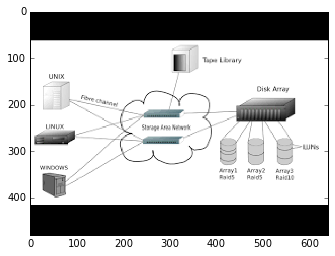

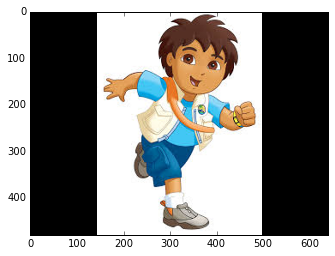

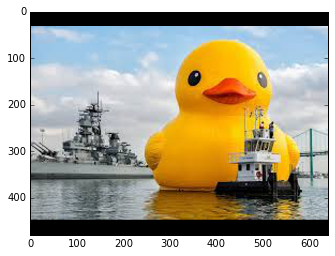

In [164]:
for i, (word, _, _) in enumerate(timings):
    if image_this(word):
        plt.figure()
        plt.imshow(resize_image(Image.open(image_folder+query2key(word)+'0.jpg')))
#         plt.figure()
#         plt.imshow(np.array(resize_image(Image.open(image_folder+query2key(word)+'.jpg'))))
        if i > 5:
            break

In [143]:
for word, _, _ in timings:
    if image_this(word):
        print word

San
Diego
largest
scientific
research
hubs
country
Intrepid
scientist
Discovery
pushing
frontiers
human
knowledge
rad
scientist
where
scientist
becomes
subject
I'm
house
Margo
wall
today
Brad
scientist
Starman
Observatory
associate
professor
astronomy
San
Diego
University
space
career
astronomer
almost
didn't
happen
understand
why
Orange
County
mid-90s
Robert
teen
take
him
everyday
practice
I'm
leaving
I'm
getting
car
right
school
trombones
somebody
cleaned
window
school
buildings
yells
where
play
Trombone
I'm
looking
trombones
head
yeah
then
said
join
band
okay
said
hey
got
gig
Saturday
trombone
players
grounded
sitting
him
wasn't
start
band
called
special
might
know
Reel
Big
Fish
specialty
Ska
remember
Scott
Wright
ended
band
1994
right
Scott
household
word
1994
didn't
know
Scott
until
got
snob
basically
actually
did
lot
band
went
tour
summer
senior
high
school
basically
living
dream
show
cuz
hurt
band
play
sudden
amazing
great
real
small
car
rental
tiny
hotel
room
full
hotel
room
cu

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
logo_file = "/home/mthielk/Transcription/margot logo2_3k-by-3k.jpg"

In [165]:
FPS = 60
width = 640
height = 480
fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
# fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter("/home/mthielk/Transcription/video1.avi",fourcc,FPS,(width,height),True)

In [166]:
# cur_img = Image.new('RGBA', (width, height), 'black')
cur_img = resize_image(Image.open(logo_file))

In [167]:
frame = 0
next_word_idx = 0
next_word, next_start, next_end = timings[next_word_idx]

In [168]:
while frame < wav_length * FPS:
    if frame > next_start * FPS:
        print frame, freq_dict[query2key(next_word)] < cutoff, next_word
        if freq_dict[query2key(next_word)] < cutoff:
            cur_img = resize_image(Image.open(image_folder+query2key(next_word)+str(np.random.randint(num_images))+'.jpg'))
        next_word_idx += 1
        if next_word_idx < len(timings):
            next_word, next_start, next_end = timings[next_word_idx]
        else:
            next_start = wav_length
    video.write(np.array(cur_img))
    frame += 1

video.release()

259 True San
283 True Diego
307 False is
319 False one
331 False of
337 False the
343 True largest
349 True scientific
415 True research
445 True hubs
469 False in
481 False the
482 True country
517 False so
565 False who
595 False are
613 False the
631 True Intrepid
655 True scientist
691 False in
709 False search
721 False of
727 True Discovery
763 True pushing
805 False the
817 True frontiers
847 False of
853 True human
877 True knowledge
883 False this
937 False is
973 True rad
1009 True scientist
1189 True where
1213 False the
1225 True scientist
1261 True becomes
1273 False the
1297 True subject
1333 True I'm
1381 False your
1393 True house
1411 True Margo
1441 True wall
1465 True today
1507 False is
1519 True Brad
1537 True scientist
1573 False is
1603 False a
1615 True Starman
1663 True Observatory
1938 False and
1957 False a
1958 True associate
2035 True professor
2065 False of
2095 True astronomy
2131 False at
2143 True San
2161 True Diego
2167 False State
2179 True Universit

13081 True summer
13093 False and
13135 True end
13147 False up
13153 True getting
13165 False a
13171 True job
13195 False with
13225 False this
13231 True group
13243 True called
13255 True Supernova
13285 True cosmology
13309 True project
13339 True they're
13375 False just
13393 False the
13405 True ones
13489 False who
13495 True decide
13525 False to
13531 True take
13537 False me
13543 False on
13555 False a
13609 True project
13753 True sounds
13849 True epic
13861 False and
13915 False it
13927 False is
13939 False to
14005 True understand
14035 True why
14047 False we
14059 True need
14071 False to
14077 False get
14089 True familiar
14107 False with
14131 True Supernova
14179 False or
14215 False in
14245 True Japanese
14263 False in
14389 True almost
14419 False all
14437 True languages
14473 False it
14485 True means
14497 False the
14509 True same
14510 True thing
14527 True super
14587 True newstar
14635 False which
14689 False is
14707 True paradoxical
14761 True becaus

24499 False to
24511 False some
24523 True point
24529 False in
24547 True slows
24565 True down
24589 False and
24595 True then
24607 False it
24608 True reverses
24637 False in
24649 True classes
24679 False back
24691 True down
24709 True that's
24757 False what
24775 False the
24781 True team
24799 True expected
24853 False to
24854 False see
24865 False that
24907 False the
24919 True expansion
24943 False of
24961 False the
24967 True universe
24985 False is
25015 True slowing
25051 True down
25057 False so
25111 False they
25135 True came
25153 False up
25159 False with
25171 False a
25177 True clever
25189 True way
25207 False to
25213 True test
25231 False their
25249 True Theory
25273 False the
25327 True way
25339 False that
25363 False we
25375 True figured
25387 False out
25405 False the
25447 True expansion
25477 True rate
25489 False of
25490 False the
25495 True universe
25513 False is
25519 True actually
25525 True using
25555 True Supernova
25585 False we
25627 True o

35701 False for
35707 True supernova
35731 True supernova
35785 False were
35797 True found
35827 False and
35869 True anything
36049 True before
36097 False I
36127 False find
36145 True something
36157 False that
36169 False is
36181 False so
36205 False out
36223 False of
36235 False the
36241 True scope
36253 False of
36265 True previous
36301 True findings
36337 False you
36385 False have
36397 False a
36403 True lot
36415 False of
36421 True emotions
36463 False you
36493 True might
36499 True even
36523 False go
36535 True through
36547 False the
36559 True three
36577 True stages
36607 False of
36619 True Discovery
36655 True stage
36709 True 1
36727 True disbelief
36793 True taking
36859 True Santa's
36883 False it
36889 False was
36895 False an
36901 True oddball
36919 False in
36937 True many
36955 True many
36967 True ways
36968 True except
37153 False this
37219 True came
37243 True after
37261 False he
37267 True found
37279 True another
37291 True Supernova
37321 True fi

In [34]:
timings[0]

(u'San', 4.3, 4.7)

In [ ]:
#ffmpeg -i video.avi -i RobertQuimby_mixdown171210.wav -vcodec copy -acodec copy combined_video.avi
#ffmpeg -i video.avi -vcodec libx264 -crf 24 -vpre medium compressed.avi
#ffmpeg -i compressed.avi -i RobertQuimby_mixdown171210.mp3 -vcodec copy -acodec copy combined_compressed.avi
#ffmpeg -i combined_video.avi -vcodec libx264 -crf 24 -vpre medium post_compressed.avi


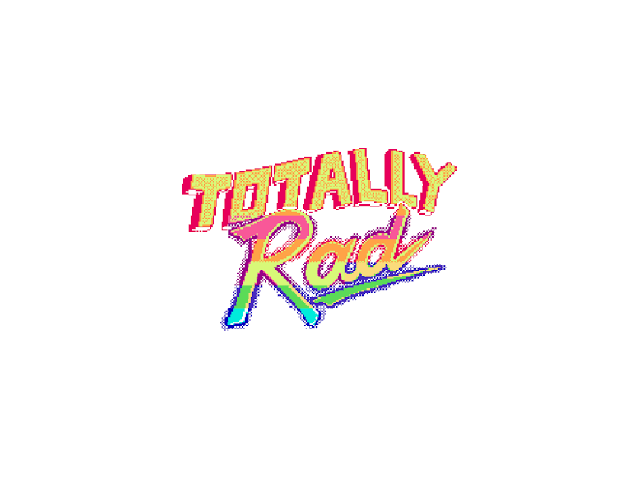

In [75]:
cur_img